In [38]:
import os
import folium
import json
import numpy as np
import pandas as pd

In [39]:
# x1 = pd.ExcelFile('data/2018_Table_1_03_B.xlsx')
# x2 = pd.ExcelFile('data/2016_Table_1_03_B.xlsx')
# x3 = pd.ExcelFile('data/2014_Table_1_06_B.xlsx')
# x4 = pd.ExcelFile('data/2012_epmxlfile1_6_b.xls')
# x5 = pd.ExcelFile('data/2010_epmxlfile1_6_b.xls')

In [40]:
x1 = pd.ExcelFile('2018_Table_1_01.xlsx')
x2 = pd.ExcelFile('2016_Table_1_01.xlsx')
x3 = pd.ExcelFile('2014_Table_1_01.xlsx')
x4 = pd.ExcelFile('2012_epmxlfile1_1.xls')
x5 = pd.ExcelFile('2010_epmxlfile1_1.xls')

In [41]:
df = x1.parse(x1.sheet_names[0])
# Parse specified sheet(s) into a DataFrame
# Equivalent to read_excel(ExcelFile, ...) See the read_excel
# docstring for more info on accepted parameters

In [42]:
# remove the first 3 rows
df1 = df.iloc[2:]
df1

,"Table 1.1. Net Generation by Energy Source: Total (All Sectors), 2007-December 2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
2,Period,Coal,Petroleum\nLiquids,Petroleum\nCoke,Natural\nGas,Other\nGas,Nuclear,Hydroelectric\nConventional,Solar,Renewable\nSources\nExcluding\nHydroelectric a...,Hydroelectric\nPumped\nStorage,Other,Total Generation at Utility Scale Facilities,Estimated Solar Photovoltaic,Estimated Total Solar Photovoltaic,Estimated Total Solar
3,Annual Totals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,2016456,49505,16234,896590,13453,806425,247510,612,104626,-6896,12231,4156745,NaN,NaN,NaN
5,2008,1985801,31917,14325,882981,11707,806208,254831,864,125237,-6288,11804,4119388,NaN,NaN,NaN
6,2009,1755904,25972,12964,920979,10632,798855,273445,891,143388,-4627,11928,3950331,NaN,NaN,NaN
7,2010,1847290,23337,13724,987697,11313,806968,260203,1212,165961,-5501,12855,4125060,NaN,NaN,NaN
8,2011,1733430,16086,14096,1013689,11566,790204,319355,1818,192163,-6421,14154,4100141,NaN,NaN,NaN
9,2012,1514043,13403,9787,1225894,11898,769331,276240,4327,214006,-4950,13787,4047765,NaN,NaN,NaN
10,2013,1581115,13820,13344,1124836,12853,789016,268565,9036,244472,-4681,13588,4065964,NaN,NaN,NaN
11,2014,1581710,18276,11955,1126609,12022,797166,259367,17691,261522,-6174,13461,4093606,11233,26482,28924


In [43]:
# select the first 12 rows as the new table
# Purely integer-location based indexing for selection by position.
df2 = df1.iloc[range(13)]
df2

,"Table 1.1. Net Generation by Energy Source: Total (All Sectors), 2007-December 2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
2,Period,Coal,Petroleum\nLiquids,Petroleum\nCoke,Natural\nGas,Other\nGas,Nuclear,Hydroelectric\nConventional,Solar,Renewable\nSources\nExcluding\nHydroelectric a...,Hydroelectric\nPumped\nStorage,Other,Total Generation at Utility Scale Facilities,Estimated Solar Photovoltaic,Estimated Total Solar Photovoltaic,Estimated Total Solar
3,Annual Totals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,2016456,49505,16234,896590,13453,806425,247510,612,104626,-6896,12231,4156745,NaN,NaN,NaN
5,2008,1985801,31917,14325,882981,11707,806208,254831,864,125237,-6288,11804,4119388,NaN,NaN,NaN
6,2009,1755904,25972,12964,920979,10632,798855,273445,891,143388,-4627,11928,3950331,NaN,NaN,NaN
7,2010,1847290,23337,13724,987697,11313,806968,260203,1212,165961,-5501,12855,4125060,NaN,NaN,NaN
8,2011,1733430,16086,14096,1013689,11566,790204,319355,1818,192163,-6421,14154,4100141,NaN,NaN,NaN
9,2012,1514043,13403,9787,1225894,11898,769331,276240,4327,214006,-4950,13787,4047765,NaN,NaN,NaN
10,2013,1581115,13820,13344,1124836,12853,789016,268565,9036,244472,-4681,13588,4065964,NaN,NaN,NaN
11,2014,1581710,18276,11955,1126609,12022,797166,259367,17691,261522,-6174,13461,4093606,11233,26482,28924


In [65]:
# use the first row as column name
new_header = df2.iloc[0]
df3 = df2[1:]
df3.columns = new_header 
df3

2,Period,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gas,Nuclear,Hydroelectric Conventional,Solar,Renewable Sources Excluding Hydroelectric and Solar,Hydroelectric Pumped Storage,Other,Total Generation at Utility Scale Facilities,Estimated Solar Photovoltaic,Estimated Total Solar Photovoltaic,Estimated Total Solar
3,Annual Totals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2007,2016456,49505,16234,896590,13453,806425,247510,612,104626,-6896,12231,4156745,NaN,NaN,NaN
5,2008,1985801,31917,14325,882981,11707,806208,254831,864,125237,-6288,11804,4119388,NaN,NaN,NaN
6,2009,1755904,25972,12964,920979,10632,798855,273445,891,143388,-4627,11928,3950331,NaN,NaN,NaN
7,2010,1847290,23337,13724,987697,11313,806968,260203,1212,165961,-5501,12855,4125060,NaN,NaN,NaN
8,2011,1733430,16086,14096,1013689,11566,790204,319355,1818,192163,-6421,14154,4100141,NaN,NaN,NaN
9,2012,1514043,13403,9787,1225894,11898,769331,276240,4327,214006,-4950,13787,4047765,NaN,NaN,NaN
10,2013,1581115,13820,13344,1124836,12853,789016,268565,9036,244472,-4681,13588,4065964,NaN,NaN,NaN
11,2014,1581710,18276,11955,1126609,12022,797166,259367,17691,261522,-6174,13461,4093606,11233,26482,28924
12,2015,1352398,17372,10877,1333482,13117,797178,249080,24893,270268,-5091,14028,4077601,14139,35805,39032


In [114]:
# select the first 13 columns as the new table
df4 = df3.iloc[:, range(13)]
df5 = df4.iloc[1:]
# df3.columns
df5.rename(columns={'Period': 'year'}, inplace=True)
# df5.reset_index(inplace=True)
df5

/Users/wkw/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



2,year,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gas,Nuclear,Hydroelectric Conventional,Solar,Renewable Sources Excluding Hydroelectric and Solar,Hydroelectric Pumped Storage,Other,Total Generation at Utility Scale Facilities
4,2007,2016456,49505,16234,896590,13453,806425,247510,612,104626,-6896,12231,4156745
5,2008,1985801,31917,14325,882981,11707,806208,254831,864,125237,-6288,11804,4119388
6,2009,1755904,25972,12964,920979,10632,798855,273445,891,143388,-4627,11928,3950331
7,2010,1847290,23337,13724,987697,11313,806968,260203,1212,165961,-5501,12855,4125060
8,2011,1733430,16086,14096,1013689,11566,790204,319355,1818,192163,-6421,14154,4100141
9,2012,1514043,13403,9787,1225894,11898,769331,276240,4327,214006,-4950,13787,4047765
10,2013,1581115,13820,13344,1124836,12853,789016,268565,9036,244472,-4681,13588,4065964
11,2014,1581710,18276,11955,1126609,12022,797166,259367,17691,261522,-6174,13461,4093606
12,2015,1352398,17372,10877,1333482,13117,797178,249080,24893,270268,-5091,14028,4077601
13,2016,1239149,13008,11197,1378307,12807,805694,267812,36054,305579,-6686,13754,4076675


In [115]:
df5.index = np.arange(1, len(df5) + 1)
df5
# df5.columns

2,year,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gas,Nuclear,Hydroelectric Conventional,Solar,Renewable Sources Excluding Hydroelectric and Solar,Hydroelectric Pumped Storage,Other,Total Generation at Utility Scale Facilities
1,2007,2016456,49505,16234,896590,13453,806425,247510,612,104626,-6896,12231,4156745
2,2008,1985801,31917,14325,882981,11707,806208,254831,864,125237,-6288,11804,4119388
3,2009,1755904,25972,12964,920979,10632,798855,273445,891,143388,-4627,11928,3950331
4,2010,1847290,23337,13724,987697,11313,806968,260203,1212,165961,-5501,12855,4125060
5,2011,1733430,16086,14096,1013689,11566,790204,319355,1818,192163,-6421,14154,4100141
6,2012,1514043,13403,9787,1225894,11898,769331,276240,4327,214006,-4950,13787,4047765
7,2013,1581115,13820,13344,1124836,12853,789016,268565,9036,244472,-4681,13588,4065964
8,2014,1581710,18276,11955,1126609,12022,797166,259367,17691,261522,-6174,13461,4093606
9,2015,1352398,17372,10877,1333482,13117,797178,249080,24893,270268,-5091,14028,4077601
10,2016,1239149,13008,11197,1378307,12807,805694,267812,36054,305579,-6686,13754,4076675


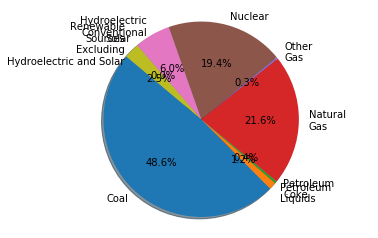

In [99]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Coal', 'Petroleum\nLiquids', 'Petroleum\nCoke', 'Natural\nGas',\
       'Other\nGas', 'Nuclear', 'Hydroelectric\nConventional', 'Solar',\
       'Renewable\nSources\nExcluding\nHydroelectric and Solar'
# len(labels)
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection
sizes = df5.iloc[0,1:10].tolist()
type(sizes)
sizes
# sizes = [215, 130, 245, 210,215, 130, 245, 210, 215, 130]
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",\
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22","#17becf"]
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",\
#           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
# explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# # Plot
plt.pie(sizes,labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()


In [109]:
labels = ['Coal', 'Petroleum Liquids', 'Petroleum Coke', 'Natural Gas',\
       'Other Gas', 'Nuclear', 'Hydroelectric Conventional', 'Solar',\
       'Renewable Sources Excluding Hydroelectric and Solar']
type(labels)


list

In [110]:
import plotly.plotly as py
import plotly.graph_objs as go

# import matplotlib.pyplot as plt
 
# Data to plot
# labels = 'Coal', 'Petroleum\nLiquids', 'Petroleum\nCoke', 'Natural\nGas',\
#        'Other\nGas', 'Nuclear', 'Hydroelectric\nConventional', 'Solar',\
#        'Renewable\nSources\nExcluding\nHydroelectric and Solar'
# len(labels)
# https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/#iloc-selection
values = df5.iloc[0,1:10].tolist()
type(sizes)
sizes
# sizes = [215, 130, 245, 210,215, 130, 245, 210, 215, 130]
# colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",\
#           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22","#17becf"]
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd",\
#           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
# explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# # Plot
# plt.pie(sizes,labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=140)

# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#         autopct='%1.1f%%', shadow=True, startangle=140)
 
# plt.axis('equal')
# plt.show()

# labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
# values = [4500,2500,1053,500]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

In [117]:
df5.columns

Index(['year', 'Coal', 'Petroleum\nLiquids', 'Petroleum\nCoke', 'Natural\nGas',
       'Other\nGas', 'Nuclear', 'Hydroelectric\nConventional', 'Solar',
       'Renewable\nSources\nExcluding\nHydroelectric and Solar',
       'Hydroelectric\nPumped\nStorage', 'Other',
       'Total Generation at Utility Scale Facilities'],
      dtype='object', name=2)

In [126]:
df5['Petroleum'] = df5['Petroleum\nCoke'] + df5['Petroleum\nLiquids']
df5['Gas'] = df5['Natural\nGas'] + df5['Other\nGas']
df5['Gas'] = df5['Natural\nGas'] + df5['Other\nGas']
df5['Hydroelectric'] = df5['Hydroelectric\nConventional'] + df5['Hydroelectric\nPumped\nStorage']
df5['Other Renewable'] = df5['Renewable\nSources\nExcluding\nHydroelectric and Solar'] 
df5['Total Generation'] = df5['Total Generation at Utility Scale Facilities'] 
df5.head()

/Users/wkw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/wkw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/wkw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

2,year,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Gas,Nuclear,Hydroelectric Conventional,Solar,Renewable Sources Excluding Hydroelectric and Solar,Hydroelectric Pumped Storage,Other,Total Generation at Utility Scale Facilities,Petroleum,Gas,Hydroelectric,Other Renewable,Total Generation
1,2007,2016456,49505,16234,896590,13453,806425,247510,612,104626,-6896,12231,4156745,65739,910043,240614,104626,4156745
2,2008,1985801,31917,14325,882981,11707,806208,254831,864,125237,-6288,11804,4119388,46242,894688,248543,125237,4119388
3,2009,1755904,25972,12964,920979,10632,798855,273445,891,143388,-4627,11928,3950331,38936,931611,268818,143388,3950331
4,2010,1847290,23337,13724,987697,11313,806968,260203,1212,165961,-5501,12855,4125060,37061,999010,254702,165961,4125060
5,2011,1733430,16086,14096,1013689,11566,790204,319355,1818,192163,-6421,14154,4100141,30182,1025255,312934,192163,4100141


In [131]:
# create a new dataframe with less category
df6 = pd.DataFrame(df5,columns=['year','Coal','Petroleum','Gas','Nuclear','Hydroelectric','Solar','Other Renewable','Other','Total Generation'])

In [132]:
df6

,year,Coal,Petroleum,Gas,Nuclear,Hydroelectric,Solar,Other Renewable,Other,Total Generation
1,2007,2016456,65739,910043,806425,240614,612,104626,12231,4156745
2,2008,1985801,46242,894688,806208,248543,864,125237,11804,4119388
3,2009,1755904,38936,931611,798855,268818,891,143388,11928,3950331
4,2010,1847290,37061,999010,806968,254702,1212,165961,12855,4125060
5,2011,1733430,30182,1025255,790204,312934,1818,192163,14154,4100141
6,2012,1514043,23190,1237792,769331,271290,4327,214006,13787,4047765
7,2013,1581115,27164,1137689,789016,263884,9036,244472,13588,4065964
8,2014,1581710,30231,1138631,797166,253193,17691,261522,13461,4093606
9,2015,1352398,28249,1346599,797178,243989,24893,270268,14028,4077601
10,2016,1239149,24205,1391114,805694,261126,36054,305579,13754,4076675


Text(0.5,1,'Solar Source Used in Electricity Generation 2007-2017')

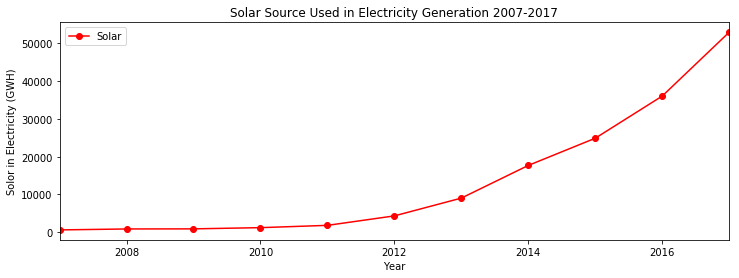

In [143]:
df6['Coal'].max #2016456
df6['Coal'].min #1207901

<bound method Series.min of 1     2016456
2     1985801
3     1755904
4     1847290
5     1733430
6     1514043
7     1581115
8     1581710
9     1352398
10    1239149
11    1207901
Name: Coal, dtype: object>

In [134]:
import plotly
plotly.__version__

'2.5.1'

In [133]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['Coal','Petroleum','Gas','Nuclear','Hydroelectric','Solar','Other Renewable','Other']
# 2007 
values = df6.iloc[0,1:9].tolist()
# how to plot two pie charts in one graph


# great resource to learn pie chart
# https://blog.algorexhealth.com/2018/03/almost-10-pie-charts-in-10-python-libraries/
    
trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

In [135]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

n_bins = 10
x = np.random.randn(1000, 3)
colors = ['red', 'tan', 'lime']
ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

NameError: name 'ax1' is not defined

/Users/wkw/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6224: RuntimeWarning:

invalid value encountered in true_divide



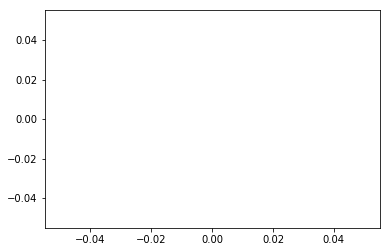

In [137]:
# create 3 data sets with 1,000 samples
mu, sigma = 200, 25
x = mu + sigma*np.random.randn(1000,3)

#Stack the data
plt.figure()
n, bins, patches = plt.hist(x, 30, stacked=True, normed = True)
# plt.show()

##Continued from above
###Now as three separate arrays
# x1 = mu + sigma*np.random.randn(990,1)
# x2 = mu + sigma*np.random.randn(980,1)
# x3 = mu + sigma*np.random.randn(1000,1)
x1 = df6['Coal']
x2 = df6['Petroleum']
x3 = df6['Gas']
#Stack the data
plt.figure()
plt.hist([x1,x2,x3], bins, stacked=True, normed = True)
plt.show()

In [150]:
tuple(df6['Coal'].tolist())

(2016456,
 1985801,
 1755904,
 1847290,
 1733430,
 1514043,
 1581115,
 1581710,
 1352398,
 1239149,
 1207901)

In [167]:
ind = np.arange(11) 
ind + 2007

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [175]:
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.tools as tls
# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

N = 11
# menMeans = df6['Coal'].tolist()
# womenMeans = df6['Gas'].tolist()
menMeans = tuple(df6['Coal'].tolist())
womenMeans = tuple(df6['Gas'].tolist())
# menStd = (2, 3, 4, 1, 2)
# womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = ax.bar(ind, menMeans, width, color=(0.2588,0.4433,1.0))
p2 = ax.bar(ind, womenMeans, width, color=(1.0,0.5,0.62),
             bottom=menMeans)
ax.set_ylabel('Electricity (GWH)')
ax.set_xlabel('Year')
ax.set_title('U.S. Electricity 2007-2017')

ax.set_xticks(ind + width)
# ax.set_xticks(ind + 2007)
# ax.set_xticks(tuple(df6['year'].tolist()))
ax.set_yticks(np.arange(1200000, 2200000, 500000)) 
# ax.set_xticklabels(('2007', '2008', '2009', '2010', '2011'))
# ax.set_xticklabels(tuple(df6['year'].tolist()))
# womenMeans = tuple(df6['year'].tolist())

plotly_fig = tls.mpl_to_plotly( mpl_fig )

# For Legend
plotly_fig["layout"]["showlegend"] = True
plotly_fig["data"][0]["name"] = "Coal"
plotly_fig["data"][1]["name"] = "Gas"


plot_url = py.plot(plotly_fig, filename='U.S. Electricity Source Structure Evolution 2007-2017')

/Users/wkw/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:516: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



In [206]:
# need a stacked bar chart
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=df6['year'].tolist(),
    y=df6['Coal'].tolist(),
    name='Coal'
)
trace2 = go.Bar(
    x=df6['year'].tolist(),
    y=df6['Gas'].tolist(),
    name='Gas'
)
# 'Nuclear','Hydroelectric','Solar','Other Renewable','Other'
trace3 = go.Bar(
    x=df6['year'].tolist(),
    y=df6['Nuclear'].tolist(),
    name='Nuclear'
)
trace4 = go.Bar(
    x=df6['year'].tolist(),
    y=df6['Solar'].tolist(),
    name='Solar'
)
trace5 = go.Bar(
    x=df6['year'].tolist(),
    y=df6['Hydroelectric'].tolist(),
    name='Hydroelectric'
)
trace6 = go.Bar(
    x=df6['year'].tolist(),
    y=df6['Other Renewable'].tolist(),
    name='Other Renewable'
)
trace7 = go.Bar(
    x=df6['year'].tolist(),
    y=df6['Other'].tolist(),
    name='Other'
)
trace8 = go.Bar(
    x=df6['year'].tolist(),
    y=df6['Petroleum'].tolist(),
    name='Petroleum'
)
data = [trace1, trace2,trace3,trace4,trace5,trace6,trace7,trace8]
# https://plot.ly/python/bar-charts/
layout = go.Layout(
    barmode='stack',
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    title = 'U.S. Electricity Sources 2007-2017',
    yaxis=dict(
        title='Generation (GWH)',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar')
    
    

Text(0.5,1,'Solar Source Used in Electricity Generation 2007-2017')

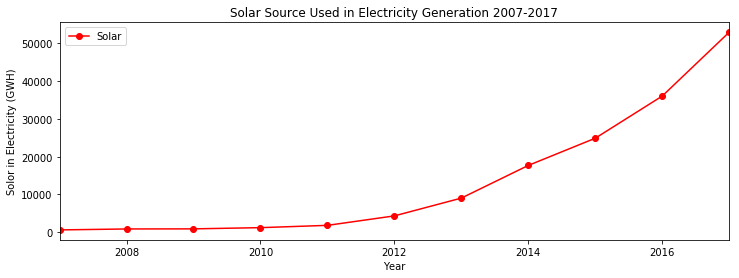

In [215]:
# Plotting the difference in polls between Obama and Romney
%matplotlib inline
fig = df6.plot('year','Solar',figsize=(12,4),marker='o',linestyle='-',color='red')
plt.xlabel('Year')
plt.ylabel('Solor in Electricity (GWH)')
plt.title('Solar Source Used in Electricity Generation 2007-2017')

In [100]:
import plotly.plotly as py
import plotly.graph_objs as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500,2500,1053,500]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

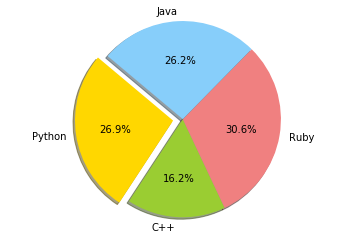

In [73]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Python', 'C++', 'Ruby', 'Java'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [55]:
df5.reset_index(inplace=True)
# df6 = df5.iloc[1:]
df5.columns
# # df5.rename(columns={'Census Division\nand State': 'state'}, inplace=True)
# 'year', 'Coal', 'Petroleum\nLiquids', 'Petroleum\nCoke',
#        'Natural\nGas', 'Other\nGas', 'Nuclear', 'Hydroelectric\nConventional',
#        'Solar', 'Renewable\nSources\nExcluding\nHydroelectric and Solar',
#        'Hydroelectric\nPumped\nStorage', 'Other',
#        'Total Generation at Utility Scale Facilities'
# df5

Index(['index', 'year', 'Coal', 'Petroleum\nLiquids', 'Petroleum\nCoke',
       'Natural\nGas', 'Other\nGas', 'Nuclear', 'Hydroelectric\nConventional',
       'Solar', 'Renewable\nSources\nExcluding\nHydroelectric and Solar',
       'Hydroelectric\nPumped\nStorage', 'Other',
       'Total Generation at Utility Scale Facilities'],
      dtype='object', name=2)

In [49]:
df5.columns()

TypeError: 'Index' object is not callable

In [47]:
# this function will remove the non-related rows and columnes
def clean_data(xl_file):
    df = xl_file.parse(xl_file.sheet_names[0])
    # remove the first four rows
    df1 = df.iloc[4:]
    # use the first row as column name
    new_header = df1.iloc[0]
    df2 = df1[1:]
    df2.columns = new_header 
    # select the first three columns as the new table
    df3 = df2.iloc[:, range(3)]
    df3.rename(columns={'Census Division\nand State': 'state'}, inplace=True)
#     print(df3.columns)
    return df3


In [4]:
def remove_census_division(df, column_name):
    mask = (df[column_name] != 'Middle Atlantic') &\
    (df[column_name] !='East North Central') &\
    (df[column_name] !='West North Central') &\
    (df[column_name] !='South Atlantic') &\
    (df[column_name] !='East South Central') &\
    (df[column_name] !='West South Central') &\
    (df[column_name] !='Mountain') &\
    (df[column_name] !='Pacific Contiguous') &\
    (df[column_name] !='Pacific Noncontiguous') &\
    (df[column_name] !='U.S. Total') & \
    (df[column_name] != 'New England')
    new_df = df[mask].dropna(how='any').reset_index(drop=True)
    return new_df

In [5]:
# This make it convient for the first plot on map
def change_state_abbre(df, column_name):
    states_hash ={
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'District of Columbia': 'DC',
    'Federated States Of Micronesia': 'FM',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Marshall Islands': 'MH',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands': 'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
  }
    df[column_name]=df[column_name].map(states_hash)
    return df

In [6]:
# this is a overall function that calls functions for clean_data, \
# remove devision, and change state abbreviation. 
def state_usage1714(xl_file):
    df3 = clean_data(xl_file)
    df4 = remove_census_division(df3, 'state')
    df5 = change_state_abbre(df4, 'state')
#     df5.rename(columns={'Census Division\nand State': 'state'}, inplace=True)
    return df5

result1714 = pd.merge(state_usage1714(x1),state_usage1714(x2), on='state')

/Users/kaiwei.wang/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [7]:
# need use a slightly different method to clean 2014, 2010, 2012 file
# because the heads are different
def clean_data2(xl_file):
    df = xl_file.parse(xl_file.sheet_names[0])
    # remove the first three rows  - different than clean_data()
    df1 = df.iloc[3:]
    # use the first row as column name
    new_header = df1.iloc[0]
    df2 = df1[1:]
    df2.columns = new_header 
    # select the first three columns as the new table
    df3 = df2.iloc[:, range(3)]
    return df3

# this is to remove the state divisions listed in the first column
def remove_census_division2(df, column_name):
    mask = (df[column_name] != 'Middle Atlantic') &\
    (df[column_name] !='East North Central') &\
    (df[column_name] !='West North Central') &\
    (df[column_name] !='South Atlantic') &\
    (df[column_name] !='East South Central') &\
    (df[column_name] !='West South Central') &\
    (df[column_name] !='Mountain') &\
    (df[column_name] !='Pacific Contiguous') &\
    (df[column_name] !='Pacific Noncontiguous') &\
    (df[column_name] !='U.S. Total') & \
    (df[column_name] != 'New England')
    new_df = df[mask].dropna(how='any').reset_index(drop=True)
    return new_df

def state_usage1308(xl_file,column_name):
    df3 = clean_data2(xl_file)
    df3.columns = column_name
    df4 = remove_census_division2(df3, 'state')
    df5 = change_state_abbre(df4, 'state')
#     df5.rename(columns={'Census Division\nand State': 'state'}, inplace=True)
    return df5

In [9]:
state_usage1312 = state_usage1308(x3,['state','December 2013 YTD','December 2012 YTD'])
state_usage1110 = state_usage1308(x4,['state','December 2011 YTD','December 2010 YTD'])
state_usage0908 = state_usage1308(x3,['state','December 2009 YTD','December 2008 YTD'])
result1310 = pd.merge(state_usage1312,state_usage1110, on='state')
result1308 = pd.merge(result1310,state_usage0908, on='state')

# merge two data structure into one
result1708 = pd.merge(result1714,result1308, on='state')
# Finally, this is the data I am using to plot US states electricity power usage
state_usage = result1708
# write and save under the same folder in data
state_usage.to_csv('result/state_usage.csv')
# state_usage
# state_usage.columns

In [10]:
# read it as a dataframe
df_state=pd.read_csv('result/state_usage.csv')
# to explore the data 
print(df_state.shape)
df_state.head(2)

(51, 12)


,Unnamed: 0,state,December 2017 YTD,December 2016 YTD,December 2015 YTD,December 2014 YTD,December 2013 YTD,December 2012 YTD,December 2011 YTD,December 2010 YTD,December 2009 YTD,December 2008 YTD
0,0,CT,34108,36497,37649,33677,35444,36118,33603,33350.0,35444,36118
1,1,ME,11192,11514,12157,13249,14079,14429,15778,17019.0,14079,14429


In [11]:
# Display data statistics for each year 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(df_state.describe())

,Unnamed: 0,December 2017 YTD,December 2016 YTD,December 2015 YTD,December 2014 YTD,December 2013 YTD,December 2012 YTD,December 2011 YTD,December 2010 YTD,December 2009 YTD,December 2008 YTD
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00
mean,25.00,78721.67,79934.82,80144.69,80266.75,79572.75,79367.98,80504.59,80883.59,79572.75,79367.98
std,14.87,76851.86,77536.92,77627.54,76598.80,75980.50,75274.94,76655.65,75046.12,75980.50,75274.94
min,0.00,67.00,76.00,69.00,68.00,60.00,72.00,130.00,200.00,60.00,72.00
25%,12.50,33837.00,34704.50,34624.00,32991.50,35402.50,35645.50,34271.50,34943.00,35402.50,35645.50
50%,25.00,60574.00,60445.00,58857.00,60120.00,60165.00,60933.00,60568.00,57509.00,60165.00,60933.00
75%,37.50,103162.50,108016.00,108788.00,109537.00,107548.50,109535.50,108851.50,107852.00,107548.50,109535.50
max,50.00,452235.00,454048.00,450604.00,437630.00,433526.00,429813.00,437043.00,411695.00,433526.00,429813.00
